## analyses on betacorona dataset - proteins

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_table("../src/prot/betacorona_prot.csv", sep=",", index_col=0)
df['Country'] = df.Geo_Location.apply(lambda s: s.split(':')[0] if isinstance(s, str) else s )

#separating complete genomes
#long_df = df[df.Nuc_Completeness == 'complete'].copy()

df.head()

,Accession,Fasta,Release_Date,Species,Genus,Family,Length,Sequence_Type,Nuc_Completeness,Genotype,Segment,Authors,Publications,Geo_Location,Host,Isolation_Source,Collection_Date,BioSample,GenBank_Title,Country
0,AAU04661,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,2005-08-23T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,1255,GenBank,partial,NaN,NaN,"Wang,M., Yan,M., Xu,H., Liang,W., Kan,B., Zhen...",16485471,China: Southern China,Viverridae,feces,NaN,NaN,spike glycoprotein [SARS coronavirus civet014],China
1,AAU04648,MESLVLGVNEKTHVQLSLPVLQVRDVLVRGFGDSVEEALSEAREHL...,2005-08-23T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,7073,GenBank,complete,NaN,NaN,"Wang,M., Yan,M., Xu,H., Liang,W., Kan,B., Zhen...",16485471,China: Southern China,Viverridae,feces,NaN,NaN,replicase p1AB [SARS coronavirus civet010],China
2,AAU04658,MSDNGPQSNQRSAPRITFGGPTDSTDNNQNGGRNGARPKQRRPQGL...,2005-08-23T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,422,GenBank,complete,NaN,NaN,"Wang,M., Yan,M., Xu,H., Liang,W., Kan,B., Zhen...",16485471,China: Southern China,Viverridae,feces,NaN,NaN,nucleocapsid protein [SARS coronavirus civet010],China
3,AAU04650,MDLFMRIFTLGSITAQPVKIDNASHASTVRATATIPLQASLPFGWL...,2005-08-23T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,274,GenBank,complete,NaN,NaN,"Wang,M., Yan,M., Xu,H., Liang,W., Kan,B., Zhen...",16485471,China: Southern China,Viverridae,feces,NaN,NaN,orf3 [SARS coronavirus civet010],China
4,AAU04656,MNELTLIDFYLCFLAFLLFLVLIMLIIFWFSLEIQDLEEPCTKV,2005-08-23T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,44,GenBank,complete,NaN,NaN,"Wang,M., Yan,M., Xu,H., Liang,W., Kan,B., Zhen...",16485471,China: Southern China,Viverridae,feces,NaN,NaN,orf9 [SARS coronavirus civet010],China


In [11]:
df.Species.unique()

array(['Severe acute respiratory syndrome-related coronavirus',
       'Alpaca coronavirus', 'Betacoronavirus 1',
       'Middle East respiratory syndrome-related coronavirus',
       'Tylonycteris pachypus bat coronavirus HKU4-related',
       'Tylonycteris bat coronavirus HKU4',
       'Eidolon bat coronavirus/Kenya/KY24/2006',
       'Bat Coronavirus Taper/CII_KSA_287/Bisha/Saudi Arabia/2012',
       'Kenya bat coronavirus/BtKY56/BtKY55',
       'Rousettus bat coronavirus HKU9', 'Coronavirus PREDICT CoV-23',
       'Coronavirus PREDICT CoV-24', 'Betacoronavirus sp.',
       'Rousettus bat coronavirus GCCDC1',
       'Rousettus Bat Betacoronavirus strain ML_3I',
       'Rousettus Bat Betacoronavirus strain ML_7I',
       'Rousettus Bat Betacoronavirus strain ML_44I',
       'Rousettus Bat Betacoronavirus strain ML_101I',
       'Rousettus Bat Betacoronavirus strain ML_83I',
       'Rousettus Bat Betacoronavirus ML_56I',
       'Rousettus Bat Betacoronavirus strain ML_70I',
       'Co

# Dataset exploration

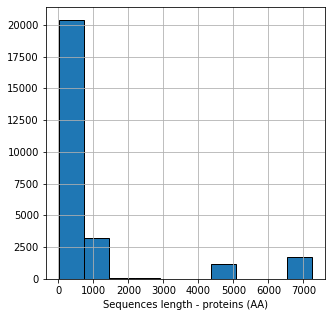

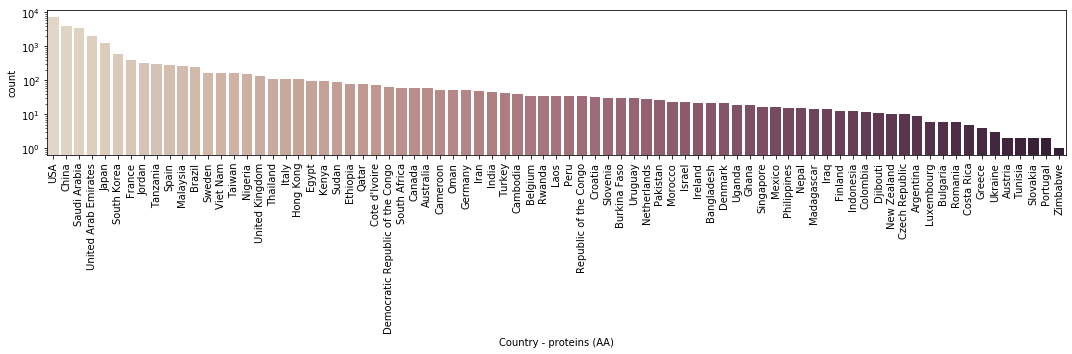

<Figure size 432x288 with 0 Axes>

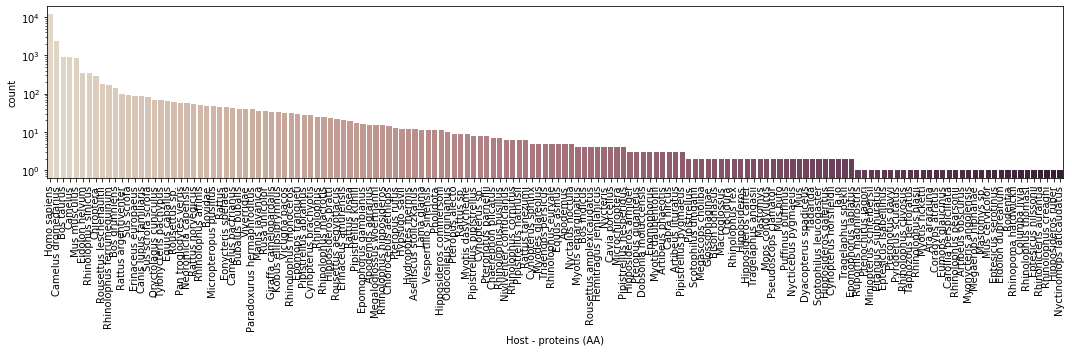

In [12]:
fig, ax = plt.subplots(1, figsize=(5,5))
g1 = df.Length.hist(ax = ax, edgecolor="k")
g1.set_xlabel('Sequences length - proteins (AA)')
plt.savefig("../plots/beta/EDA/lengths_beta_proteins.pdf")
#plt.savefig("lengths.png", dpi=600)

#>1000 complete genomes
#>5000 partial cds
#~1000 of something around 30k nt

## I'll group countries ignoring second-level data.
## Losing some information to provide better visualization

##by country
fig, ax = plt.subplots(1, figsize=(15,5))
chart = sns.countplot(x="Country", palette="ch:.25", data=df, ax=ax,
                     order = df['Country'].value_counts().index);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_xlabel('Country - proteins (AA)')
chart.set_yscale("log")

plt.tight_layout()
plt.savefig("../plots/beta/EDA/countries_beta_proteins.pdf")
plt.show()


#########
plt.clf()

##by host
fig, ax = plt.subplots(1, figsize=(15,5))
chart = sns.countplot(x="Host", palette="ch:.25", data=df, ax=ax,
                     order = df['Host'].value_counts().index);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_xlabel('Host - proteins (AA)')
chart.set_yscale("log")

plt.tight_layout()
plt.savefig("../plots/beta/EDA/host_beta_proteins.pdf")
plt.show()

#plt.savefig("countries.png", dpi=600)

In [26]:
print("unique genbank titles: ", df.GenBank_Title.nunique())

df['Protein'] = df.GenBank_Title.apply(lambda s: s.split("[")[0].strip())

print("unique protein names: ", df.Protein.nunique())

df.groupby("Protein").count().sort_values('Accession', ascending=False).head(30).Accession

unique genbank titles:  3868
unique protein names:  1321


Protein
RNA-dependent RNA polymerase, partial    1353
envelope protein                         1080
membrane protein                          831
spike glycoprotein                        754
nucleocapsid protein                      681
spike protein                             562
nucleocapsid phosphoprotein               537
membrane glycoprotein                     527
surface glycoprotein                      459
N protein                                 403
ORF10 protein                             393
ORF6 protein                              392
ORF3a protein                             391
ORF8 protein                              389
ORF7a protein                             386
spike glycoprotein, partial               378
orf1ab polyprotein                        368
nucleoprotein                             323
ORF3                                      317
ORF4a                                     312
ORF4b                                     311
spike protein, partial    

## Word2Vec model

In [47]:
## TODO NOT READY FROM THERE -- qua bisogna impostare robe divise per proteina

proteomes = df.Fasta.copy()

In [48]:
%%time

kmer_len = 4

#let's keep the original indexing to allow lookups from the starting data
corpus = []
ordered_indexes = [] #probably overkill, but let's avoid forgetting the indexes to retrieve metadata

for i, seq in complete_genomes.iteritems():
    ordered_indexes.append(i)
    corpus.append([seq[j:j+kmer_len] for j in np.arange(0, len(seq)-kmer_len)])
    
#All that is required is that the input yields one sentence (list of utf8 words) after another.
#it takes around 40 seconds

CPU times: user 32.5 s, sys: 2.94 s, total: 35.4 s
Wall time: 36.5 s


## train model - once (look down for a thorough param search)

In [49]:
from gensim.models import Word2Vec

size= 100
tot_epochs= 5
perplexity=30

model = Word2Vec(sentences=corpus, min_count=1, size=size, iter=tot_epochs)

# Visualization
## summarize sentences (genomes) by making word means (or sum, whatever, their length is pretty much the same) and tSNE the results

#### make it as colors/labels are interchangeable

In [123]:
from sklearn.decomposition import IncrementalPCA    # initial reduction
from sklearn.manifold import TSNE                   # final reduction

def reduce_dimensions(model, ordered_indexes, corpus, df=df, label="Species",
                     perplexity=30):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = [] # positions in vector space
    labels = [] # keep track of words to label our data again later

    for i, sentence in zip(ordered_indexes, corpus):

        vectors.append(np.mean([model.wv[word] for word in sentence], axis=0))
        labels.append(df.iloc[i][label])
        
    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)

    # reduce using t-SNE
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=0, perplexity=perplexity)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

In [91]:
x_vals, y_vals, labels = reduce_dimensions(model, ordered_indexes, corpus, 
                                                         label="GenBank_Title")

In [113]:
from sklearn import preprocessing

def plot_with_matplotlib(x_vals, y_vals, labels, color_labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    le = preprocessing.LabelEncoder()
    le.fit(color_labels)
    cmappable_labels = le.transform(color_labels)
    
    fig, ax = plt.subplots(1, figsize=(10, 10))
    unique = np.unique(color_labels)
    colors = [plt.cm.rainbow(i/float(len(unique)-1)) for i in range(len(unique))]
    for i, u in enumerate(unique):
        xi = [x_vals[j] for j  in range(len(x_vals)) if color_labels[j] == u]
        yi = [y_vals[j] for j  in range(len(x_vals)) if color_labels[j] == u]
        
        edgecolor ='k' if (u == "Homo sapiens") else None
        
        plt.scatter(xi, yi, c=(colors[i],), label=str(u), edgecolor=edgecolor)
        
    plt.legend(bbox_to_anchor=(1.05, 1.0, 0.3, 0.2), loc='upper left')
    
    selected_indices = [i for i,s in enumerate(labels) if "coronavirus 2" in s]
    for i in selected_indices:
        plt.annotate('°', (x_vals[i], y_vals[i]))
    
    return fig,ax

In [121]:
geo_labels = []
date_labels = []
host_labels = []
for i, sentence in zip(ordered_indexes, corpus):
    geo_labels.append(df.iloc[i]['Country'])
    date_labels.append(df.iloc[i]['Release_Date'])
    host_labels.append(df.iloc[i]['Host'])

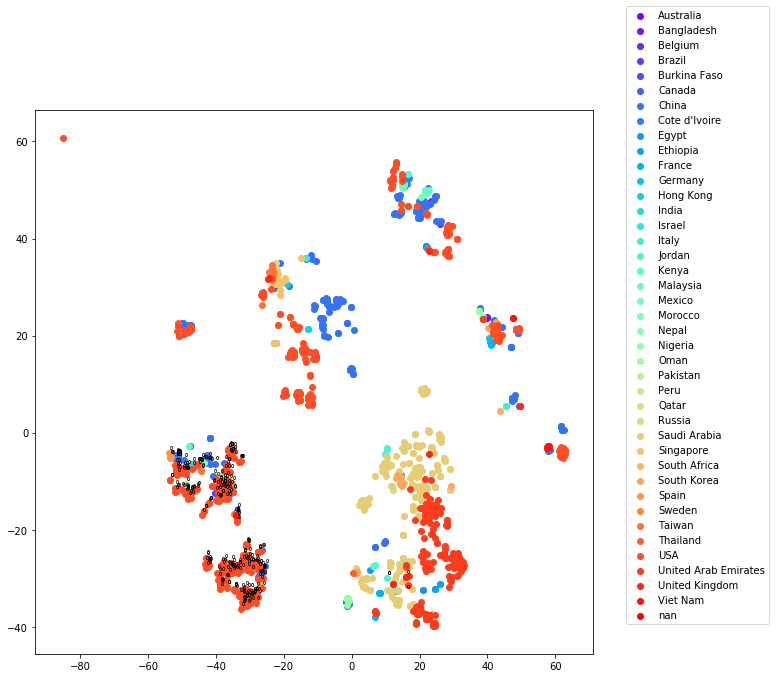

In [122]:
##color_labels
_,_= plot_with_matplotlib(x_vals, y_vals, labels, geo_labels)

plt.savefig(f"tsne_beta_w2vsize_{size}_epochs_{tot_epochs}_perpl_{perplexity}.pdf")

##TODO remove nan, plot with different labels

## TODO - param search